In [1]:
from utils import *
from contextlib import redirect_stdout
import warnings

# Model
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

warnings.filterwarnings('ignore')

In [2]:
root_path = 'D:/Face recognition/pics'
n_components = 50

# Data preparation

In [3]:
X, y = create_database(root_path)

100%|██████████| 40/40 [00:00<00:00, 86.27it/s] 


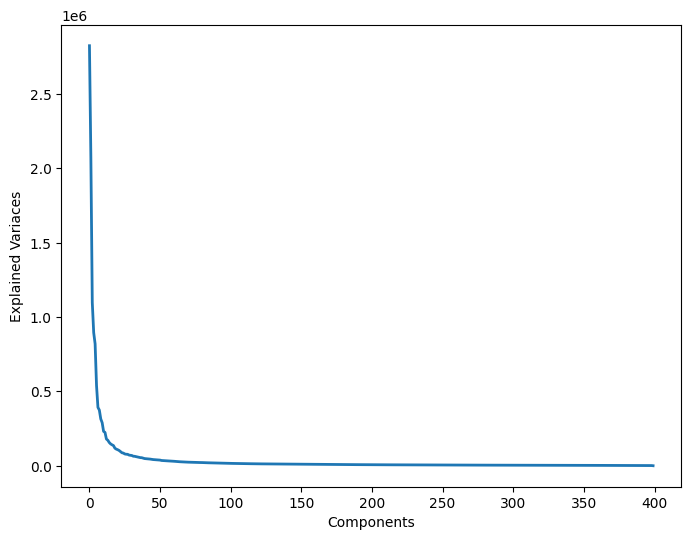

In [4]:
pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(8,6))

plt.plot(pca.explained_variance_, linewidth=2)

plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [5]:
pca=PCA(n_components=n_components)
pca.fit(X)
X_pca=pca.transform(X)

# Fit data with distance bases

In [6]:
methods = [euclidean_distance, mahattan_distance, minkowski_distance, sse,
           ab_distance, ccb_distance, mahalanobis_distance, chi2_distance,
           canbera_distance, modified_mahattan_distance]

In [7]:
for method in methods:
    with open(os.devnull, 'w') as f, redirect_stdout(f):
        score = cross_validation_db(X_pca, y, 5, method)
    print(f'{str(method)} cross validation score: {score:.5f}')

100%|██████████| 80/80 [00:00<00:00, 8840.82it/s]


<function euclidean_distance at 0x0000029EAA8E3F78> cross validation score: 0.96750
<function mahattan_distance at 0x0000029EAA8AA9D8> cross validation score: 0.96500
<function minkowski_distance at 0x0000029EAA912798> cross validation score: 0.96250
<function sse at 0x0000029EAA912C18> cross validation score: 0.96750
<function ab_distance at 0x0000029EAA917DC8> cross validation score: 0.96500
<function ccb_distance at 0x0000029EAA917F78> cross validation score: 0.96500
<function mahalanobis_distance at 0x0000029EAA91B288> cross validation score: 0.93750
<function chi2_distance at 0x0000029EAA91B1F8> cross validation score: 0.00500
<function canbera_distance at 0x0000029EAA91B168> cross validation score: 0.94500
<function modified_mahattan_distance at 0x0000029EAA91BDC8> cross validation score: 0.96750


# Fit data with ML model

In [8]:
models=[]
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))
models.append(("RF",RandomForestClassifier()))



In [9]:
cross_validation_ml(X_pca, y, 5, models)

LDA mean cross validations score:0.99000
LR mean cross validations score:0.98750
NB mean cross validations score:0.88750
KNN mean cross validations score:0.88500
DT mean cross validations score:0.60750
SVM mean cross validations score:0.96750
RF mean cross validations score:0.92750
